In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('affairs.csv')

In [4]:
df.head()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6366 non-null   int64  
 1   rate_marriage    6366 non-null   float64
 2   age              6366 non-null   float64
 3   yrs_married      6366 non-null   float64
 4   children         6366 non-null   float64
 5   religious        6366 non-null   float64
 6   educ             6366 non-null   float64
 7   occupation       6366 non-null   float64
 8   occupation_husb  6366 non-null   float64
 9   affairs          6366 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [21]:
x = df.drop(["Unnamed: 0","affairs"], axis=1)

In [22]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [23]:
y = []
for affair in df['affairs']:
    y.append(round(affair))

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 123)

In [26]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
klasifikasi = KNeighborsClassifier(n_neighbors=8, weights='uniform',
                          algorithm='auto',
                          leaf_size=30,
                          p=2,
                          metric='minkowski',
                          n_jobs=-1)

In [35]:
klasifikasi.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=8)

In [36]:
y_pred = klasifikasi.predict(x_test)

In [37]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [38]:
klasifikasi.predict_proba(x_test)

array([[0.375, 0.375, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.625, 0.375, 0.   , ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.375, 0.5  , 0.125, ..., 0.   , 0.   , 0.   ],
       [0.375, 0.25 , 0.25 , ..., 0.   , 0.   , 0.   ],
       [0.875, 0.   , 0.125, ..., 0.   , 0.   , 0.   ]])

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test, y_pred))

[[1168   28    3    0    0    1    0    0    0    0    0    0    0    0]
 [ 179   12    4    0    0    0    0    0    0    0    0    0    0    0]
 [  63    3    1    0    0    0    0    0    0    0    0    0    0    0]
 [  51    7    1    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  38    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   6    0    1    0    0    0    0    0    0    0    0    0    0    0]
 [  12    1    0    0    0    1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0

In [41]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.86      1200
           1       0.24      0.06      0.10       195
           2       0.10      0.01      0.03        67
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        38
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2

    accuracy                           0.74      1592
   macro avg       0.08      0.07      0.07      1592
weighted avg       0.61      0.74      0.66      1592



C:\Users\icoek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icoek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\icoek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = accuracy_score(y_test, y_pred)

In [44]:
accuracy

0.7418341708542714

In [45]:
from statistics import *

In [46]:
import matplotlib.pyplot as plt

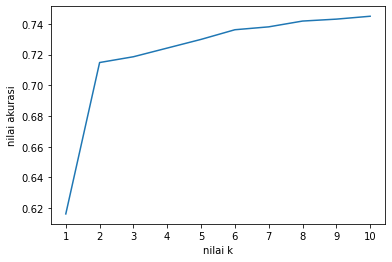

In [47]:
mean(y)
hasil=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred=knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    hasil.append(acc)
plt.plot(hasil)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai k')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()